## **09-3 LSTM과 GRU 셀**

### 9-3-1 LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb

(train,target1),(test,target2)=imdb.load_data(num_words=500)

from sklearn.model_selection import train_test_split

train,val,target1,target3=train_test_split(train,target1,test_size=0.2,random_state=0)

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq=pad_sequences(train,maxlen=100)
val_seq=pad_sequences(val,maxlen=100)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [12]:
from tensorflow import keras

m = keras.Sequential()

m.add(keras.layers.Embedding(input_dim=500, output_dim=16, input_length=100, input_shape=(100,)))
m.add(keras.layers.LSTM(8))
m.add(keras.layers.Dense(1, activation='sigmoid'))

m.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
m.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

cb1 = keras.callbacks.ModelCheckpoint('RNN_EMB_BM.keras',save_best_only=True)
cb2 = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = m.fit(train_seq, target1, epochs=20, batch_size=32,
                validation_data=(val_seq, target3),
                callbacks=[cb1, cb2])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6298 - loss: 0.6274 - val_accuracy: 0.7730 - val_loss: 0.4797
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7881 - loss: 0.4634 - val_accuracy: 0.7850 - val_loss: 0.4507
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8015 - loss: 0.4284 - val_accuracy: 0.7936 - val_loss: 0.4361
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8124 - loss: 0.4175 - val_accuracy: 0.7922 - val_loss: 0.4438
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8137 - loss: 0.4106 - val_accuracy: 0.7976 - val_loss: 0.4294
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8114 - loss: 0.4035 - val_accuracy: 0.7932 - val_loss: 0.4396
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8186 - loss: 0.3896 - val_accuracy: 0.8002 - val_loss: 0.4255
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8236 - loss: 0.3866 - val_accuracy: 0

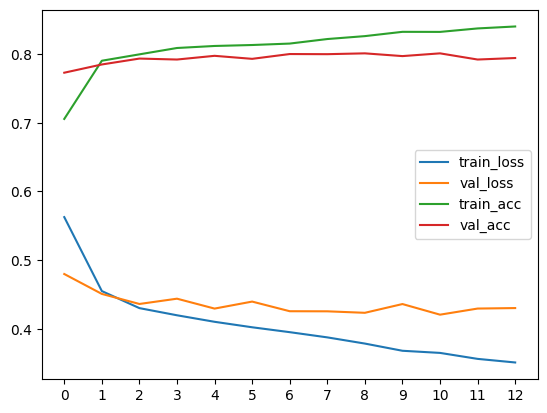

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(range(0, 13, 1))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(range(0, 13, 1))
plt.legend(['train_loss', 'val_loss','train_acc','val_acc'])
plt.show()

### 9-3-2 순환 층에 드롭아웃 적용하기

In [15]:
from tensorflow import keras

m = keras.Sequential()

m.add(keras.layers.Embedding(input_dim=500, output_dim=16, input_length=100, input_shape=(100,)))
m.add(keras.layers.LSTM(8,dropout=0.3))
m.add(keras.layers.Dense(1, activation='sigmoid'))

m.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
m.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

cb1 = keras.callbacks.ModelCheckpoint('RNN_EMB_BM.keras',save_best_only=True)
cb2 = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = m.fit(train_seq, target1, epochs=20, batch_size=32,
                validation_data=(val_seq, target3),
                callbacks=[cb1, cb2])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6187 - loss: 0.6288 - val_accuracy: 0.7710 - val_loss: 0.4854
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7902 - loss: 0.4524 - val_accuracy: 0.7772 - val_loss: 0.4701
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8011 - loss: 0.4355 - val_accuracy: 0.7482 - val_loss: 0.5203
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8018 - loss: 0.4309 - val_accuracy: 0.7854 - val_loss: 0.4497
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8047 - loss: 0.4267 - val_accuracy: 0.7746 - val_loss: 0.4504
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8111 - loss: 0.4150 - val_accuracy: 0.7804 - val_loss: 0.4440
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8073 - loss: 0.4149 - val_accuracy: 0.7898 - val_loss: 0.4368
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8127 - loss: 0.4043 - val_accuracy: 0.

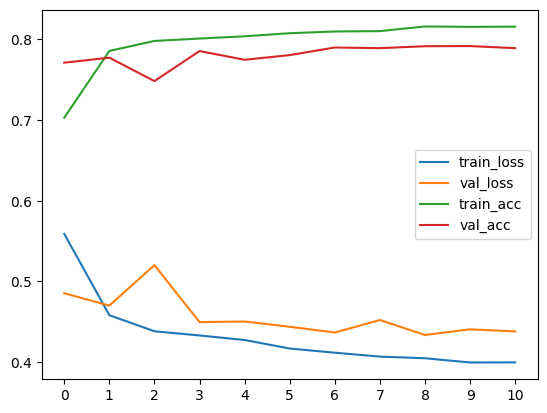

In [20]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(range(0, 11, 1))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(range(0, 11, 1))
plt.legend(['train_loss', 'val_loss','train_acc','val_acc'])
plt.show()

### 9-3-3 2개의 층을 연결하기

In [21]:
from tensorflow import keras

m = keras.Sequential()

m.add(keras.layers.Embedding(input_dim=500, output_dim=16, input_length=100, input_shape=(100,)))
m.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
m.add(keras.layers.LSTM(8,dropout=0.3))
m.add(keras.layers.Dense(1, activation='sigmoid'))

m.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
m.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

cb1 = keras.callbacks.ModelCheckpoint('RNN_EMB_BM.keras',save_best_only=True)
cb2 = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = m.fit(train_seq, target1, epochs=20, batch_size=32,
                validation_data=(val_seq, target3),
                callbacks=[cb1, cb2])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6398 - loss: 0.6254 - val_accuracy: 0.7668 - val_loss: 0.4927
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7794 - loss: 0.4778 - val_accuracy: 0.7858 - val_loss: 0.4662
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7965 - loss: 0.4462 - val_accuracy: 0.7794 - val_loss: 0.4609
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7998 - loss: 0.4390 - val_accuracy: 0.7774 - val_loss: 0.4679
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8080 - loss: 0.4208 - val_accuracy: 0.7876 - val_loss: 0.4462
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8063 - loss: 0.4200 - val_accuracy: 0.7892 - val_loss: 0.4459
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8169 - loss: 0.4096 - val_accuracy: 0.7958 - val_loss: 0.4403
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8152 - loss: 0.4057 - val_

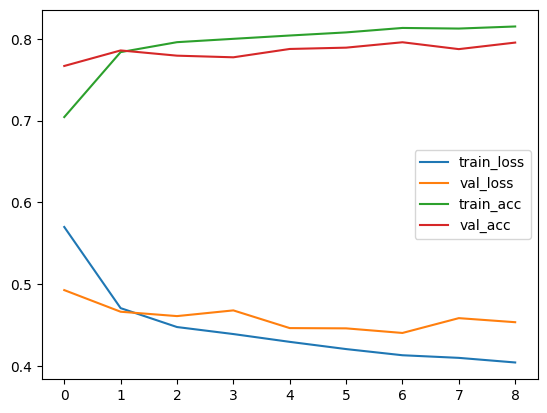

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(range(0, 9, 1))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(range(0, 9, 1))
plt.legend(['train_loss', 'val_loss','train_acc','val_acc'])
plt.show()

### 9-3-4 GRU 신경망 훈련하기

In [26]:
from tensorflow import keras

m = keras.Sequential()

m.add(keras.layers.Embedding(input_dim=500, output_dim=16, input_length=100, input_shape=(100,)))
m.add(keras.layers.GRU(8))
m.add(keras.layers.Dense(1, activation='sigmoid'))

m.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
m.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

cb1 = keras.callbacks.ModelCheckpoint('RNN_EMB_BM.keras',save_best_only=True)
cb2 = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = m.fit(train_seq, target1, epochs=20, batch_size=32,
                validation_data=(val_seq, target3),
                callbacks=[cb1, cb2])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6073 - loss: 0.6423 - val_accuracy: 0.7066 - val_loss: 0.5551
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7727 - loss: 0.4803 - val_accuracy: 0.7806 - val_loss: 0.4528
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7949 - loss: 0.4411 - val_accuracy: 0.7896 - val_loss: 0.4411
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8128 - loss: 0.4161 - val_accuracy: 0.7762 - val_loss: 0.4608
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8200 - loss: 0.4013 - val_accuracy: 0.7914 - val_loss: 0.4351
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8161 - loss: 0.4061 - val_accuracy: 0.7958 - val_loss: 0.4265
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8219 - loss: 0.3971 - val_accuracy: 0.8010 - val_loss: 0.4267
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8230 - loss: 0.3932 - val_accuracy: 0.

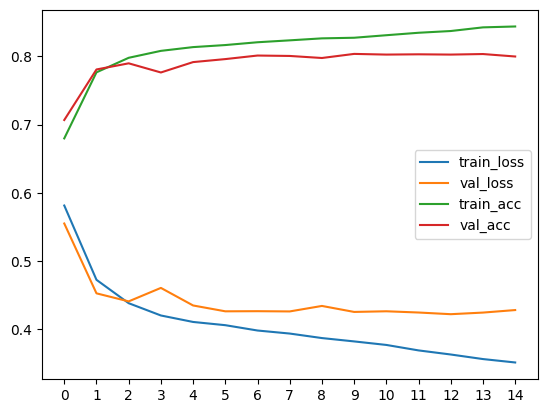

In [28]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(range(0, 15, 1))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(range(0, 15, 1))
plt.legend(['train_loss', 'val_loss','train_acc','val_acc'])
plt.show()

In [30]:
from tensorflow import keras

m = keras.Sequential()

m.add(keras.layers.Embedding(input_dim=500, output_dim=16, input_length=100, input_shape=(100,)))
m.add(keras.layers.GRU(8,dropout=0.3,return_sequences=True))
m.add(keras.layers.GRU(8,dropout=0.3))
m.add(keras.layers.Dense(1, activation='sigmoid'))

m.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 100, 8)              │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 8)                   │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,065 (35.41 KB)

 Trainable params: 9,065 (35.41 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
m.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

cb1 = keras.callbacks.ModelCheckpoint('RNN_GRU_BM.keras',save_best_only=True)
cb2 = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = m.fit(train_seq, target1, epochs=20, batch_size=32,
                validation_data=(val_seq, target3),
                callbacks=[cb1, cb2])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5880 - loss: 0.6536 - val_accuracy: 0.7504 - val_loss: 0.5133
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7750 - loss: 0.4836 - val_accuracy: 0.7818 - val_loss: 0.4639
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7941 - loss: 0.4566 - val_accuracy: 0.7674 - val_loss: 0.4829
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8010 - loss: 0.4403 - val_accuracy: 0.7824 - val_loss: 0.4623
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8149 - loss: 0.4185 - val_accuracy: 0.7922 - val_loss: 0.4434
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8095 - loss: 0.4283 - val_accuracy: 0.7986 - val_loss: 0.4394
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8181 - loss: 0.4141 - val_accuracy: 0.7964 - val_loss: 0.4405
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8175 - loss: 0.4133 - va

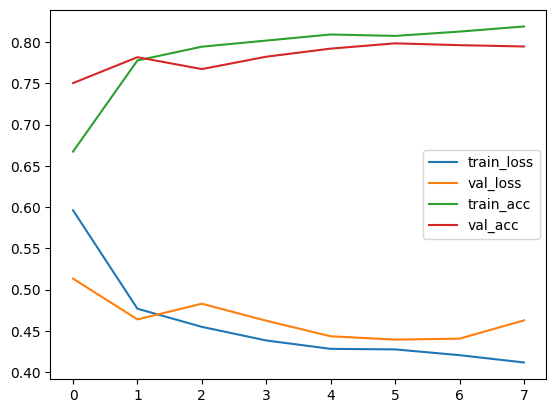

In [33]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(range(0, 8, 1))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(range(0, 8, 1))
plt.legend(['train_loss', 'val_loss','train_acc','val_acc'])
plt.show()

### 마무리

In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

test_seq = pad_sequences(test, maxlen=100)

bm = keras.models.load_model('RNN_GRU_BM.keras')

bm.evaluate(test_seq, target2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8035 - loss: 0.4329


[0.43296074867248535, 0.8039600253105164]